<a href="https://colab.research.google.com/github/girisoura/pytorch-deeplearning/blob/main/ANN_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [9]:
df= pd.read_csv('fmnist_small.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,125,72,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,3,0,2,0,0,210,228,228,233,0,0,0,0,0,0,0,0,0,31,81,133,184,201,190,117,0,0,2,1,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,43,117,34,15,24,33,117,80,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,51,144,152,...,157,158,161,148,159,58,0,6,0,0,0,0,0,0,0,0,0,4,0,60,143,143,148,146,152,152,148,148,147,145,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,0,0,0,2,0,33,114,37,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,11,17,13,13,11,10,7,5,5,5,7,0,0,0,1,0,0,41,69,88,86,94,106,114,118,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,0,2,0,58,145,114,10,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,...,165,153,155,134,143,172,215,62,0,0,0,0,0,0,0,0,10,190,178,194,209,211,209,205,211,215,213,217,225,228,213,203,174,151,188,10,0,0,0,0


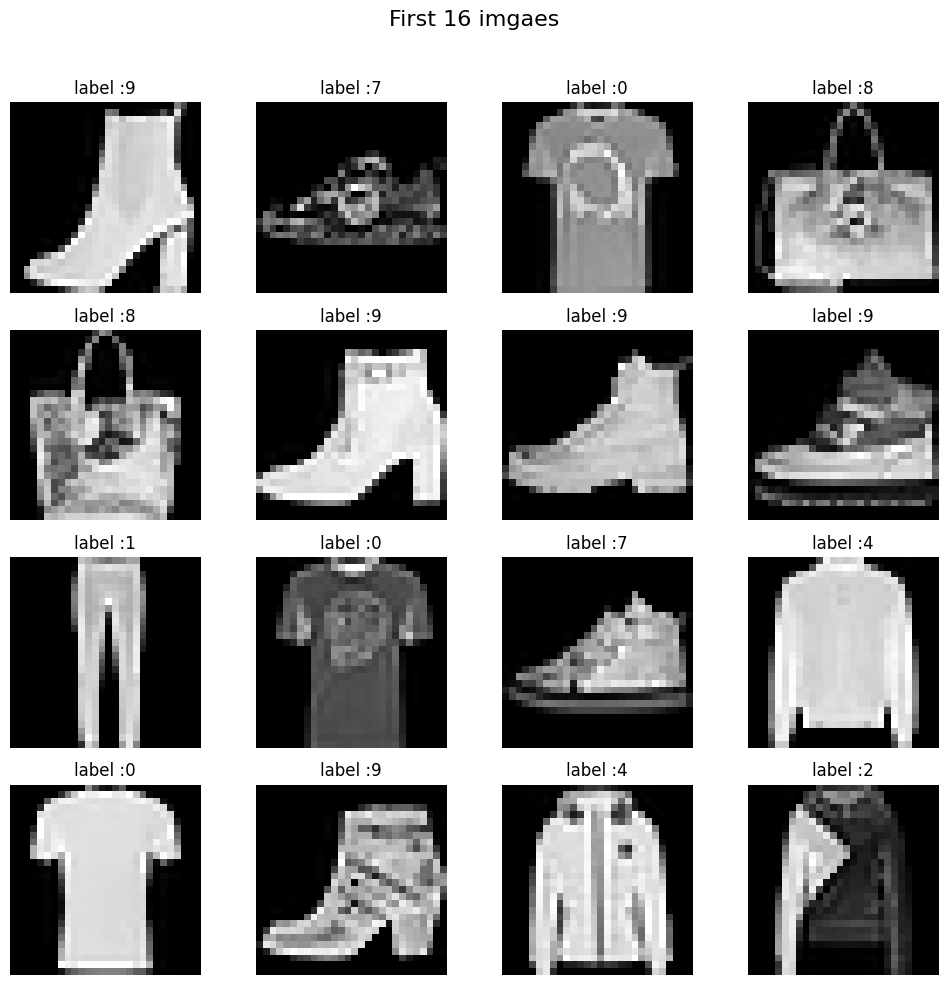

In [14]:
fig,ax= plt.subplot(4,4,figsize=(10,10))
fig.suptitle("First 16 imgaes",fontsize=16)

for i, ax in enumerate(ax.flat):
  img = df.iloc[i, 1:].values.reshape(28,28)
  ax.imshow(img, cmap='gray')
  ax.axis('off')
  ax.set_title(f"label :{df.iloc[i,0]}")
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [16]:
X = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2, random_state=42)

In [20]:
X_train=X_train/255.0
X_test=X_test/255.0

In [21]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00024606, 0.        ,
        0.        ]])

In [30]:
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features= torch.tensor(features,dtype=torch.float32)
    self.labels=torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.labels)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]

In [31]:
train_dataset = CustomDataset(X_train, y_train)

In [32]:
train_dataset[0]

(tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e

In [33]:
test_dataset=CustomDataset(X_test,y_test)

In [34]:
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True)
test_dataloader=DataLoader(test_dataset,batch_size=32,shuffle=True)

In [35]:
class Mynn(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )
  def forward(self, x):
    return self.model(x)

In [36]:
epochs= 100
learning_rate= 0.1

In [40]:
num_features=X_train.shape[1]
model=Mynn()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate)

In [41]:
len(train_dataloader)

150

In [42]:
for epoch in range(epochs):
  total_epoch_loss=0
  for batch_features,batch_labels in train_dataloader:
    outputs= model(batch_features)
    loss=criterion(outputs,batch_labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_epoch_loss+=loss.item()

  avg_loss=total_epoch_loss/len(train_dataloader)
  print(f"Epoch: {epoch+1} , loss : {avg_loss}")

Epoch: 1 , loss : 2.3043387444814045
Epoch: 2 , loss : 2.302374440828959
Epoch: 3 , loss : 2.3029099178314207
Epoch: 4 , loss : 2.3028204154968264
Epoch: 5 , loss : 2.3024564170837403
Epoch: 6 , loss : 2.3027779833475748
Epoch: 7 , loss : 2.3027157560984293
Epoch: 8 , loss : 2.3025638230641685
Epoch: 9 , loss : 2.302609767913818
Epoch: 10 , loss : 2.302511982917786
Epoch: 11 , loss : 2.3026325686772666
Epoch: 12 , loss : 2.302387754122416
Epoch: 13 , loss : 2.302425182660421
Epoch: 14 , loss : 2.3022605069478352
Epoch: 15 , loss : 2.3024599885940553
Epoch: 16 , loss : 2.3022457043329876
Epoch: 17 , loss : 2.302159841855367
Epoch: 18 , loss : 2.3022333796819052
Epoch: 19 , loss : 2.302026963233948
Epoch: 20 , loss : 2.302071655591329
Epoch: 21 , loss : 2.3018973541259764
Epoch: 22 , loss : 2.3019707584381104
Epoch: 23 , loss : 2.3017923132578533
Epoch: 24 , loss : 2.3012877988815306
Epoch: 25 , loss : 2.3013328886032105
Epoch: 26 , loss : 2.301186572710673
Epoch: 27 , loss : 2.301153928

In [43]:
model.eval()

Mynn(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)